<img align="left" src="https://statics.phbs.pku.edu.cn/uploadfile/2018/0119/20180119080526567.png" style="margin-top:50px">
<h1 align="right" style="margin-top:60px">Applied Stochastic Process (FIN 514) </h1>
<h1 align="right" style="margin-top:20px">Module 3, 2020-2021  </h1>

<h1 align="center" style="margin-top:40px">Conditional MC for Heston Model and 3/2 Model based on QE Scheme</h1>

<center>
<font color=black size=4 face=times> Team: Hu Xueyang & Hu Xiaoyin<br>
    Instructor: Jaehyuk Choi<br>
<font color=black size=3 face=times><center>(Last Modified on May 8, 2021)
<center>

<font color=black size=3 face=times>**Main references**: <br>
    <p>[1] Andersen, L. (2008). Simple and efficient simulation of the Heston stochastic volatility model. *The Journal of Computational Finance, 11*(3), 1–42. https://doi.org/10.21314/JCF.2008.189<br>
    [2] Van Haastrecht, A., & Pelsser, A. (2010). Efficient, almost exact simulation of the heston stochastic volatility model. *International Journal of Theoretical and Applied Finance, 13*(01), 1–43. https://doi.org/10.1142/S0219024910005668 <br>
    [3] Von Sydow, L., Milovanović, S., Larsson, E., In't Hout, K., Wiktorsson, M., Oosterlee, C. W., ... & Waldén, J. (2019). BENCHOP–SLV: the BENCHmarking project in Option Pricing–Stochastic and Local Volatility problems. *International Journal of Computer Mathematics, 96*(10), 1910-1923. https://doi.org/10.1080/00207160.2018.1544368 <br>
    [4] Glasserman, P., & Kim, K.-K. (2011). Gamma expansion of the Heston stochastic volatility model. *Finance & Stochastics, 15*(2), 267-296. 
https://doi.org/10.1007/s00780-009-0115-y <br>
    [5] Broadie, M., & Kaya, Ö., 2006.Exact Simulation of Stochastic Volatility and Other Affine Jump Diffusion Processes. *Operations Research, 54*, 217–231. https://doi.org/10.1287/opre.1050.0247 <br>
    [6] Kouarfate, I. R., Kouritzin, M. A., & Mackay, A. (2020). Explicit solution simulation method for the 3/2 model. *Papers*.<br>
    [7] Baldeaux, J. (2012). Exact simulation of the 3/2 model. *International Journal of Theoretical and Applied Finance, 15*(5), 1250032. https://doi.org/10.1142/S021902491250032X

## 1. QE Discretization Scheme for Heston Model 

<font color=black size=3 face=times>**1.1. Notation declaration**<br>
    &emsp;&emsp;The Heston model is defined by the coupled two-dimensional SDE:
    <br/>
    \begin{align*}
    &dS(t)/S(t)=\sqrt{V(t)}dW_S(t) ,\\
    &dV(t)=\kappa(\theta-V(t))dt+\epsilon\sqrt{V(t)}dW_V(t),
    \end{align*} 
    &emsp;&emsp;where<br>
&emsp;&emsp;- $S$ and $V$ denote stock price and volatility, respectively  
&emsp;&emsp;- $W_S$ and $W_V$ are scalar Brownian motions in some probability measure and assume that $dW_S(t)\dot dW_V(t)=\rho dt$ <br>

&emsp;&emsp;To discretize $V$, the modified **Euler Scheme** would take the form:
 \begin{align*}
   &\widehat{V}(t+\Delta)=\widehat{V}(t)+\kappa(\theta-\widehat{V}(t)^{+})\Delta+\epsilon\sqrt{\widehat{V}(t)^{+}}Z_V\sqrt{\Delta},
    \end{align*}  
    
&emsp;&emsp;The modified **Milstein Scheme** would take the form:
  \begin{align*}
   &\widehat{V}(t+\Delta)=\widehat{V}(t)+\kappa(\theta-\widehat{V}(t)^{+})\Delta+\epsilon\sqrt{\widehat{V}(t)^{+}}Z_V\sqrt{\Delta}+\frac{\epsilon^2}{4}\Delta(Z_V^2-1),
    \end{align*}  

<font color=black size=3 face=times>**1.2. TG Scheme**<br>
    &emsp;&emsp;Let
    \begin{align*}
    m&=\theta+(\widehat{V}(t)-\theta)e^{-\kappa\Delta},\tag{$1.1$}\\
    s^2&=\frac{\widehat{V}(t)\epsilon^2 e^{-\kappa\Delta}}{\kappa}(1-e^{-\kappa\Delta})+\frac{\theta\epsilon^2}{2\kappa}(1-e^{-\kappa\Delta})^2,\tag{$1.2$}\\
    \psi&\equiv s^2/m^2 =\frac{\frac{\widehat{V}(t)\epsilon^2 e^{-\kappa\Delta}}{\kappa}(1-e^{-\kappa\Delta})+\frac{\theta\epsilon^2}{2\kappa}(1-e^{-\kappa\Delta})^2}{(\theta+(\widehat{V}(t)-\theta)e^{-\kappa\Delta})^2}, \tag{$1.3$}
    \end{align*}
    &emsp;&emsp;where the $m$ and $s^2$ are from the true conditional distribution, i.e.
    \begin{align*}
    &m\equiv E(V(t+\Delta)|V(t)=\widehat{V}(t)),\\
    &s^2\equiv Var(V(t+\Delta)|V(t)=\widehat{V}(t)),\\
    &\psi\equiv s^2/m^2>0,
    \end{align*}
        &emsp;&emsp; The **TG (Truncated Gaussian) Scheme** writes
    $$\widehat{V}(t+\Delta)=(\mu+\sigma\dot Z_V)^{+},\tag{$1.4$}$$
    &emsp;&emsp; where $Z_V$ is a standart Gaussian random variable, and $\mu$ and $\sigma$ are constants that will depend on the time-step $\Delta$ and $\widehat{V}(t)$, as well as the parameters in the SDE for $V$.<br>
    &emsp;&emsp; Define the ratio $r=\mu/\sigma$, match the mean to $m$ results in:
    $$\mu=\frac{m}{r^{-1}\phi(r)+\Phi(r)};\quad \sigma=r^{-1}\mu=\frac{m}{\phi(r)+r\Phi(r)}$$
    &emsp;&emsp; where $\phi$ is pdf of normal distribution and $\Phi$ is cdf of normal distribution.<br>
    &emsp;&emsp; By matching moments and rearrangment, we have:
    $$r\phi(r)+\Phi(r)(1+r^2)=(1+\psi)(\phi(r)+r\Phi(r))^2$$
    &emsp;&emsp; Then $r$ is only a function of $\psi$, i.e. $r=r(\psi)$
    \begin{align*} 
    &\mu=f_{\mu}(\psi)\cdot m,\quad f_{\mu}(\psi)=\frac{r(\psi)}{\phi(r(\psi))+r(\psi)\Phi(r(\psi))},\tag{$1.5$}\\
    &\sigma=f_{\sigma}(\psi)\cdot s,\quad f_{\sigma}(\psi)=\frac{\psi^{-1/2}}{\phi(r(\psi))+r(\psi)\Phi(r(\psi))},\tag{$1.6$}
    \end{align*}
    &emsp;&emsp;The detailed algorithm for the TG simulation step from $\widehat{V}(t)$ to $\widehat{V}(t+\Delta)$ is as follows:<br>
    &emsp;&emsp;1.Given $\widehat{V}(t)$, compute $m$ and $s^2$ from (1.1) and (1.2)<br>
    &emsp;&emsp;2.Compute $\psi=s^2/m^2$ and look up $f_{\mu}(\psi)$ and $f_{\sigma}(\psi)$ from the pre-calculated cache<br>
    &emsp;&emsp;3.Compute $\mu$ and $\sigma$ according to equations (1.5) and (1.6)<br>
    &emsp;&emsp;4.Compute $Z_V=\Phi^{-1}(U_V)$<br>
    &emsp;&emsp;5.Set $\widehat{V}(t+\Delta)=(\mu+\sigma\dot Z_V)^{+}$

<font color=black size=3 face=times>**1.3. QE Scheme**<br>
    &emsp;&emsp; The non-central chi-square distribution approaches a Gaussian distribution as the non-centrality paremeter approaches $\infty$. However, for small $V(t)$, the non-centrality parameter approaches zero, and the Gaussian variable is typically not accurate.<br>
    &emsp;&emsp; For sufficiently large values of $\widehat{V}(t)$, the **QE (Quadratic Exponential) Scheme** writes:
    $$\widehat{V}(t+\Delta)=a(b+Z_V)^2,\tag{$1.7$}$$
    &emsp;&emsp; For low values of $\widehat{V}(t)$, we use asymptotic density and approximated density for $\widehat{V}(t+\Delta)$, we have the form:
        $$\Psi^{-1}(u)=\Psi^{-1}(u;p,\beta)=\left\{
\begin{aligned}
&0,  & 0\le u\le p \\
&\beta^{-1}ln(\frac{1-p}{1-u}),& p<u\le1.
\end{aligned},\tag{$1.8$}
\right.
$$
    &emsp;&emsp; where $\Psi(x)=Pr(\widehat{V}(t+\Delta)\leq x)=p+(1-p)(1-e^{-\beta x}), x\geq 0$ is the approximate cdf for low values of $\widehat{V}(t)$.<br> 
    &emsp;&emsp; The scheme varies when $\psi$ is big and when $\psi$ is small.<br>
    &emsp;&emsp; Assume that some arbitrary level $\psi_c\in [1,2]$ has been selected. The detailed algorithm for the QE simulation step from $\widehat{V}(t)$ to $\widehat{V}(t+\Delta)$ is then:<br>
    &emsp;&emsp;1. Given $\widehat{V}(t)$, compute $m$ and $s^2$ from the equations (1.1) and (1.2).<br>
    &emsp;&emsp;2. Compute $\psi=s^2/m^2$<br>
    &emsp;&emsp;3. Draw a uniform random number $U_V$<br>
    &emsp;&emsp;4. **If** $\psi\leq \psi_c$:<br>
    &emsp;&emsp;&emsp;&emsp;(a) Compute a and b as:
    \begin{align*}
    &b^2=2\psi^{-1}-1+\sqrt{2\psi^{-1}}\sqrt{{2\psi^{-1}-1}}\ge 0,\tag{$1.9$}\\
    &a=\frac{m}{1+b^2},\tag{$1.10$}\\
    \end{align*}
    &emsp;&emsp;&emsp;&emsp;(b) Compute $Z_V=\Phi^{-1}(U_V)$<br>
    &emsp;&emsp;&emsp;&emsp;(c) Set $\widehat{V}(t+\Delta)=a(b+Z_V)^2$<br>
    &emsp;&emsp;5.**Otherwise**, if $\psi>\psi_c$:<br>
    &emsp;&emsp;&emsp;&emsp;(a) Compute $\beta$ and $p$ as:
    \begin{align*}
    &p=\frac{\psi-1}{\psi+1}\in [0,1),\tag{$1.11$}\\
    &\beta=\frac{1-p}{m}=\frac{2}{m(\psi+1)}>0,\tag{$1.12$}\\
    \end{align*}
    &emsp;&emsp;&emsp;&emsp;(b) Set $\widehat{V}(t+\Delta)=\Psi^{-1}(U_V;p,\beta)$, where $\Psi^{-1}$ is given at (1.8)<br>
    &emsp;&emsp; To realize the **conditional MC** method, after simulating the path, calculate:
\begin{align*}
     E\left(S_T|V(T),\int V(t)dt\right)&=S_0 exp\left(\frac{\rho}{\epsilon}(V(T)-V(0))-\kappa(\theta T-\int_{0}^{T}V(t)dt)\right),\tag{$1.13$}\\
     \sigma_{BS}&=\left((1-\rho^2)\int_{0}^{T}V(t)dt\right)^{\frac{1}{2}},\tag{$1.14$}\\
    \end{align*}
    &emsp;&emsp; Then bring the forward price and volatility into the BSM option pricing model.

<font color=black size=3 face=times>**1.4. General discrete-time approximation schemes**<br>
    &emsp;&emsp;<font color=black size=3 face=times>**Kahl-Jackel Scheme**<br>
    &emsp;&emsp;Using implicit Milstein scheme to discretize the V-process and "IJK" discretization for the stock process:
    \begin{align*}
    ln\widehat{S}(t+\Delta)&=ln\widehat{S}(t)-\frac{\Delta}{4}(\widehat{V}(t+\Delta)+\widehat{V}(t))+\rho\sqrt{\widehat{V}(t)}Z_V\sqrt{\Delta}+\frac{1}{2}\left(\sqrt{\widehat{V}(t+\Delta)}+\sqrt{\widehat{V}(t)}\right)(Z_X\sqrt{\Delta}-\rho Z_V\sqrt{\Delta})+\frac{1}{4}\epsilon\rho\Delta(Z_V^2-1),\tag{$1.15$}\\
    \widehat{V}(t+\Delta) &= \frac{\widehat{V}(t)+\kappa\theta\Delta+\epsilon\sqrt{\widehat{V}(t)}Z_V\sqrt{\Delta}+\frac{1}{4}\epsilon^2\Delta(Z_V^2-1)}{1+\kappa\Delta}, \tag{$1.16$}
    \end{align*}
    <br/>
    &emsp;&emsp;<font color=black size=3 face=times>**Broadie-Kaya Scheme (Exact MC)**<br>
    &emsp;&emsp;$V(t),V(t+\Delta)$ are sampled directly from the known conditional distribution of $V(t)$ while $lnS(t),lnS(t+\Delta)$ are from Gaussian distribution. 
\begin{align*}
    V(t+\Delta)&=V(t)+\int_{t}^{t+\Delta}\kappa(\theta-V(u))du+\epsilon \int_{t}^{t+\Delta}\sqrt{V(u)}dW_V(u) ,\tag{$1.17$}\\
    lnS(t+\Delta)&=lnS(t)+\frac{\rho}{\epsilon}(V(t+\Delta)-V(t)-\kappa\theta\Delta)+(\frac{\kappa\rho}{\epsilon}-\frac{1}{2})\int_{t}^{t+\Delta}V(u)du+\sqrt{1-\rho^2}\int_{t}^{t+\Delta}\sqrt{V(u)}dW(u), \tag{$1.18$}
    \end{align*}

In [1]:
import numpy as np
import pandas as pd
from heston_cmc_qe import HestonCondMcQE
import time
import pyfeng as pf
from tqdm import tqdm

## a. Van's (2010) Heston model examples

In [2]:
# Van (2010)
strike = [100.0, 140.0, 60.0]
forward = 100
delta = [1, 1/2, 1/4, 1/8, 1/16, 1/32]
case = np.zeros([3, 7])
#case[i]=[vov, kappa, rho, texp, theta,   sigma,    r]
case[0] = [1,   0.5, -0.9, 10, 0.04, np.sqrt(0.04), 0]
case[1] = [1,   1,   -0.3, 5,  0.09, np.sqrt(0.09), 0.05]
case[2] = [0.9, 0.3, -0.5, 15, 0.04, np.sqrt(0.04), 0]
ref_price = np.array([[13.085, 0.296, 44.330], [33.597, 18.157, 56.575], [16.649, 5.138, 45.287]])

### Compute price and bias

In [4]:
# Compare with QE-M method result given by Van (2010)
i = 0
vov, kappa, rho, texp, theta, sigma, r = case[i]
price_cmc = pd.DataFrame(np.zeros([len(delta), len(strike)]), index=delta, columns=strike)
bias_cmc = pd.DataFrame(np.zeros(price_cmc.shape), index=price_cmc.index, columns=price_cmc.columns)

start = time.time()
heston_cmc_qe = HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)

for d in range(len(delta)):
    price_cmc.iloc[d, :] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e6, seed=123456)
    bias_cmc.iloc[d, :] = price_cmc.iloc[d, :] - ref_price[i, :]

end = time.time()

np.set_printoptions(suppress=True)
print('Case %s:\n' % i + 'price')
print(price_cmc)
print('bias')
print(bias_cmc)
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 0:
price
             100.0     140.0      60.0 
1.00000  14.529882  0.195448  45.556684
0.50000  13.582647  0.265386  44.595762
0.25000  13.188754  0.291642  44.356937
0.12500  13.092458  0.296434  44.326304
0.06250  13.092350  0.296121  44.355462
0.03125  13.074721  0.295712  44.304224
bias
            100.0     140.0     60.0 
1.00000  1.444882 -0.100552  1.226684
0.50000  0.497647 -0.030614  0.265762
0.25000  0.103754 -0.004358  0.026937
0.12500  0.007458  0.000434 -0.003696
0.06250  0.007350  0.000121  0.025462
0.03125 -0.010279 -0.000288 -0.025776
Running time is 1338.152 seconds.



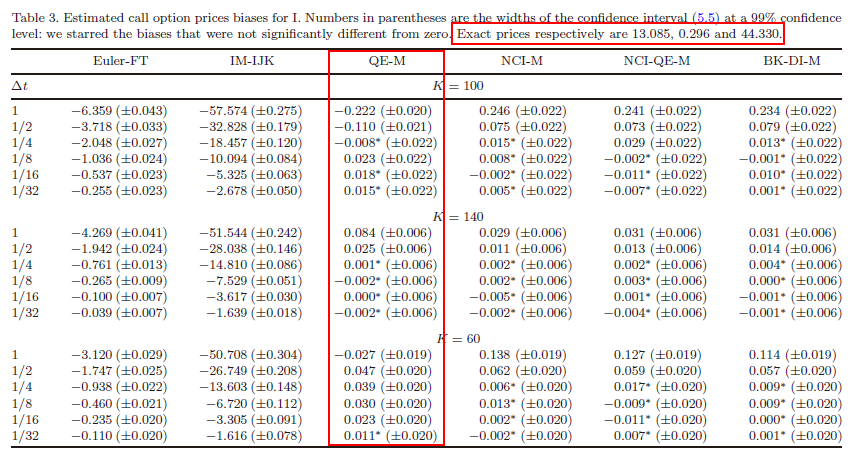

In [5]:
i = 1
vov, kappa, rho, texp, theta, sigma, r = case[i]
price_cmc = pd.DataFrame(np.zeros([len(delta), len(strike)]), index=delta, columns=strike)
bias_cmc = pd.DataFrame(np.zeros(price_cmc.shape), index=price_cmc.index, columns=price_cmc.columns)

start = time.time()
heston_cmc_qe = HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)

for d in range(len(delta)):
    price_cmc.iloc[d, :] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e6, seed=123456)
    bias_cmc.iloc[d, :] = price_cmc.iloc[d, :] - ref_price[i, :]

end = time.time()

np.set_printoptions(suppress=True)
print('Case %s:\n' % i + 'price')
print(price_cmc)
print('bias')
print(bias_cmc)
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 1:
price
             100.0      140.0      60.0 
1.00000  33.736398  17.456589  56.936861
0.50000  33.686261  17.793980  56.722795
0.25000  33.629507  18.064683  56.619026
0.12500  33.602587  18.143813  56.578587
0.06250  33.596595  18.152616  56.577033
0.03125  33.597411  18.155300  56.578049
bias
            100.0     140.0     60.0 
1.00000  0.139398 -0.700411  0.361861
0.50000  0.089261 -0.363020  0.147795
0.25000  0.032507 -0.092317  0.044026
0.12500  0.005587 -0.013187  0.003587
0.06250 -0.000405 -0.004384  0.002033
0.03125  0.000411 -0.001700  0.003049
Running time is 762.887 seconds.



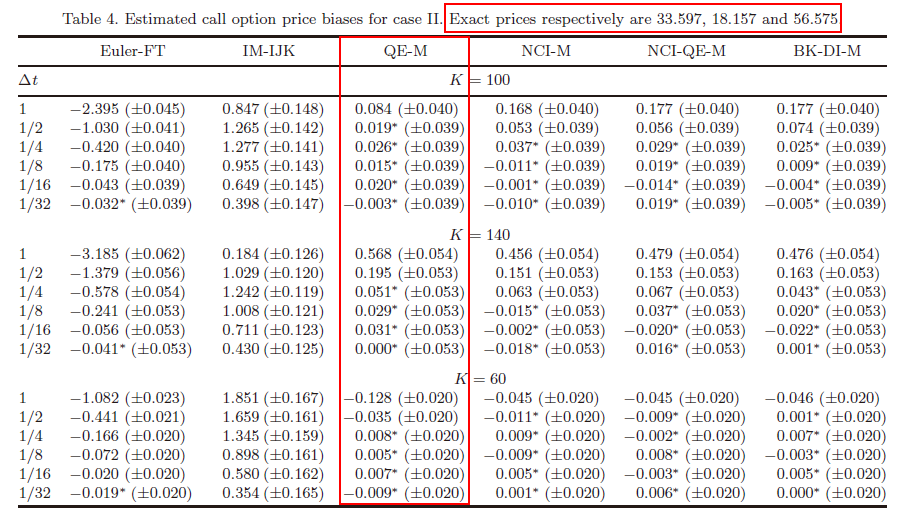

For texp=15, it takes quite a long time to compute when path=1e6, so we try path=1e5 first.

In [5]:
i = 2
vov, kappa, rho, texp, theta, sigma, r = case[i]
price_cmc = pd.DataFrame(np.zeros([len(delta), len(strike)]), index=delta, columns=strike)
bias_cmc = pd.DataFrame(np.zeros(price_cmc.shape), index=price_cmc.index, columns=price_cmc.columns)

start = time.time()
heston_cmc_qe = HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)

for d in range(len(delta)):
    price_cmc.iloc[d, :] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
    bias_cmc.iloc[d, :] = price_cmc.iloc[d, :] - ref_price[i, :]

end = time.time()

np.set_printoptions(suppress=True)
print('Case %s:\n' % i + 'price')
print(price_cmc)
print('bias')
print(bias_cmc)
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 2:
price
             100.0     140.0      60.0 
1.00000  16.149579  4.760252  45.578435
0.50000  16.416852  5.031749  45.374120
0.25000  16.617863  5.143443  45.322204
0.12500  16.648469  5.141325  45.308595
0.06250  16.676920  5.155294  45.327308
0.03125  16.649787  5.127263  45.324110
bias
            100.0     140.0     60.0 
1.00000 -0.499421 -0.377748  0.291435
0.50000 -0.232148 -0.106251  0.087120
0.25000 -0.031137  0.005443  0.035204
0.12500 -0.000531  0.003325  0.021595
0.06250  0.027920  0.017294  0.040308
0.03125  0.000787 -0.010737  0.037110
Running time is 159.433 seconds.



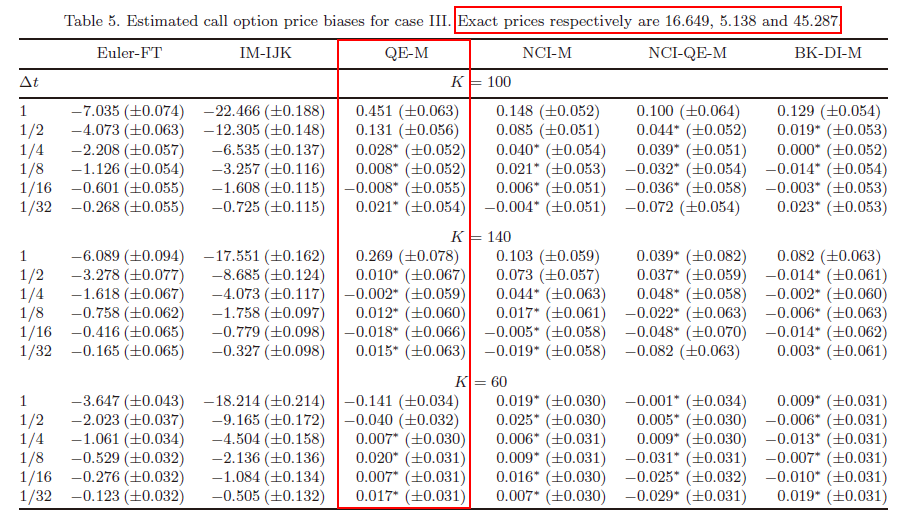

### Compute std error of price

In [7]:
n = 50
for i in range(case.shape[0]):
    start = time.time()
    vov, kappa, rho, texp, theta, sigma, r = case[i]

    heston_cmc_qe = HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
    price_cmc = np.zeros([n, len(delta), len(strike)])
    for j in range(n):
        for d in range(len(delta)):
            price_cmc[j, d, :] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e4)
            
    end = time.time()
    print('Case %s:' % i)
    print('computed price')
    print(price_cmc.mean(axis=0))
    print('std error of price')
    print(price_cmc.std(axis=0))
    print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 0:
computed price
[[14.48507482  0.19549894 45.44694332]
 [13.57640601  0.26511358 44.56747683]
 [13.18390563  0.29143047 44.33867465]
 [13.09830192  0.2965315  44.33820181]
 [13.07797818  0.29651217 44.32323189]
 [13.06361511  0.29596029 44.27433031]]
std error of price
[[0.09592296 0.00289888 0.23511073]
 [0.09410501 0.00300055 0.22671388]
 [0.08162795 0.00231195 0.1966574 ]
 [0.0793631  0.00232052 0.20513624]
 [0.07762682 0.00254269 0.21566992]
 [0.06385748 0.00182409 0.17636494]]
Running time is 458.454 seconds.

Case 1:
computed price
[[33.73075375 17.45647472 56.93031981]
 [33.6894559  17.7898265  56.73123742]
 [33.6256438  18.06701801 56.60861967]
 [33.59012918 18.13001882 56.56770531]
 [33.60037511 18.16303895 56.57313542]
 [33.60246407 18.15209035 56.5902666 ]]
std error of price
[[0.0506304  0.03934222 0.10132155]
 [0.04971055 0.03888435 0.11472079]
 [0.04963058 0.04115574 0.11098139]
 [0.04271052 0.03581481 0.10578029]
 [0.05387118 0.03525143 0.12070404]
 [0.0580927  0.

### Compare the CondMC-QE model with {CondMC with other discretization schemes, Exact MC, Almost Exact MC}

*Exact MC to be added.*

In [10]:
# from comparison import heston_exact
from comparison.heston_ae import HestonMCAe

In [10]:
delta = 1/32
path = int(1e4)
scheme = ['QE', 'TG', 'Euler', 'Milstein', 'KJ', 'AE']
n_comp = len(scheme)
price_comp = pd.DataFrame(np.zeros([len(strike), n_comp]), index=strike, columns=scheme)
bias_comp = pd.DataFrame(np.zeros(price_comp.shape), index=price_comp.index, columns=price_comp.columns)

In [11]:
for i in range(case.shape[0]):
    vov, kappa, rho, texp, theta, sigma, r = case[i]
    start = time.time()
    heston_cmc_qe = HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
    heston_mc_ae = HestonMCAe(vov=vov, kappa=kappa, rho=rho, theta=theta, r=r)

    for j in range(n_comp):
        if j < 5:
            price_comp[scheme[j]] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta, intr=r, path=path, scheme=scheme[j], seed=123456)
        elif j == 5:
            for k in range(len(strike)):
                price_comp[scheme[j]][k] = heston_mc_ae.price(strike[k], forward, texp, sigma, n_paths=path)
        bias_comp[scheme[j]] = price_comp[scheme[j]] - ref_price[i, :]
        
    end = time.time()
    print('Case %s:' % i)
    print(bias_comp)
    print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 0:
             QE         TG     Euler  Milstein         KJ        AE
100.0 -0.096580  -8.710316  0.988963  1.225481 -12.796420 -0.075044
140.0  0.000031   0.122284 -0.020186 -0.029220  -0.277154 -0.038460
60.0  -0.239033 -18.271650  0.694151  1.085792 -43.082375 -0.101300
Running time is 2950.135 seconds.

Case 1:
             QE        TG      Euler   Milstein         KJ        AE
100.0 -0.084010 -0.115373   4.173896   4.241284 -17.428871  0.022933
140.0 -0.021390  2.650926  -4.312867  -4.532404  -6.104693  0.317163
60.0  -0.173565 -2.745567  10.075882  10.220483 -33.998298  0.483264
Running time is 1493.174 seconds.

Case 2:
             QE        TG     Euler  Milstein         KJ        AE
100.0 -0.016552  5.189843  0.959258  0.881493 -13.755899 -1.007162
140.0 -0.014516  7.076082  1.583381  1.485563  -2.964516 -0.020410
60.0  -0.003585 -4.962604 -1.136084 -1.026505 -41.070293  0.151624
Running time is 4306.091 seconds.



## b. Von's (2008) Heston model example

In [12]:
# Example with multiple spots and single strike
# Von (2018), multiple forward, single strike
strike = [100.0]
forward = [75, 100, 125]
delta = [1, 1/2, 1/4, 1/8, 1/16, 1/32]
case = np.zeros([3, 7])
vov = 1
kappa = 2.58
rho = -0.36
texp = 1
theta = 0.043
sigma = np.sqrt(0.114)
r = 0
ref_price = np.array([0.908502728459621, 9.046650119220969, 28.514786399298796])

In [14]:
# compute conditional mc price and bias
# for cases with single strike and multiple forward
price_cmc = pd.DataFrame(np.zeros([len(delta), len(forward)]), index=delta, columns=forward)
bias_cmc = pd.DataFrame(np.zeros(price_cmc.shape), index=price_cmc.index, columns=price_cmc.columns)
start = time.time()
for i in range(len(forward)):
    heston_cmc_qe = HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
    for d in range(len(delta)):
        price_cmc.iloc[d, :] = heston_cmc_qe.price(strike, forward[i], texp, sigma=sigma, delta=delta[d], intr=r, path=1e6, seed=123456)
        bias_cmc.iloc[d, :] = price_cmc.iloc[d, :] - ref_price[i]

end = time.time()
np.set_printoptions(suppress=True)
print('price')
print(price_cmc)
print('bias')
print(bias_cmc)
print('Running time is %.3f seconds.' % (end - start) + '\n')

price
               75         100        125
1.00000  27.351940  27.351940  27.351940
0.50000  28.633845  28.633845  28.633845
0.25000  28.596577  28.596577  28.596577
0.12500  28.540935  28.540935  28.540935
0.06250  28.525257  28.525257  28.525257
0.03125  28.512044  28.512044  28.512044
bias
              75        100       125
1.00000 -1.162847 -1.162847 -1.162847
0.50000  0.119059  0.119059  0.119059
0.25000  0.081791  0.081791  0.081791
0.12500  0.026149  0.026149  0.026149
0.06250  0.010471  0.010471  0.010471
0.03125 -0.002743 -0.002743 -0.002743
Running time is 417.970 seconds.



## c. Broadie and Kaya's (2006) Heston model examples

In [21]:
# Broadie and Kaya (2006) 
strike = [100.0]
forward = 100
delta = [1/25, 1/50, 1/100, 1/200, 1/400, 1/800]
case = np.zeros([2, 7])
#case[i]=[vov,  kappa, rho, texp, theta,       sigma,         r]
case[0] = [0.61, 6.21, -0.70, 1,  0.019, np.sqrt(0.010201), 0.0319]
case[1] = [1.00, 2.00, -0.30, 5,  0.09,  np.sqrt(0.09),     0.0500]
ref_price = np.array([[6.8061], [34.9998]])

In [22]:
price_cmc = pd.DataFrame(np.zeros([len(delta), case.shape[0]]), index=delta, columns=['case 0', 'case 1'])
bias_cmc = pd.DataFrame(np.zeros(price_cmc.shape), index=price_cmc.index, columns=price_cmc.columns)
start = time.time()
for i in range(case.shape[0]):
    vov, kappa, rho, texp, theta, sigma, r = case[i]
    heston_cmc_qe = HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
    for d in range(len(delta)):
        price_cmc.iloc[d, i] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
        bias_cmc.iloc[d, i] = price_cmc.iloc[d, i] - ref_price[i, :]
end = time.time()  
np.set_printoptions(suppress=True)
print('price')
print(price_cmc)
print('bias')
print(bias_cmc)
print('Running time is %.3f seconds.' % (end - start) + '\n')

price
           case 0     case 1
0.04000  6.812253  35.016021
0.02000  6.818957  35.005112
0.01000  6.819050  34.974198
0.00500  6.822898  35.011193
0.00250  6.802146  35.003486
0.00125  6.803801  34.969440
bias
           case 0    case 1
0.04000  0.006153  0.016221
0.02000  0.012857  0.005312
0.01000  0.012950 -0.025602
0.00500  0.016798  0.011393
0.00250 -0.003954  0.003686
0.00125 -0.002299 -0.030360
Running time is 843.766 seconds.



## d. Glasserman and Kim's (2011) Heston model examples

*Note: The bias is large. Maybe the authors wrongly specified some parameters or we didn't get texp right.*

In [14]:
# Glasserman and Kim (2011)
strike = [100.0]
forward = 100
delta = [1/16, 1/32, 1/64, 1/128, 1/256, 1/512]
case = np.zeros([4, 7])
#case[i]=[vov, kappa, rho, texp, theta,   sigma,      r]
case[0] = [1,   0.5, -0.9,   1,  0.04, np.sqrt(0.04), 0]
case[1] = [0.9, 0.3, -0.5,   1,  0.04, np.sqrt(0.04), 0]
case[2] = [1,    1,  -0.3,   1,  0.09, np.sqrt(0.09), 0]
case[3] = [0.6, 6.2, -0.7,   1,  0.02, np.sqrt(0.02), 0]
ref_price = np.array([[6.7304], [7.0972], [11.3743], [7.0200]])

In [15]:
price_cmc = pd.DataFrame(np.zeros([len(delta), case.shape[0]]), index=delta, columns=['case 0', 'case 1', 'case 2', 'case 3'])
bias_cmc = pd.DataFrame(np.zeros(price_cmc.shape), index=price_cmc.index, columns=price_cmc.columns)
start = time.time()
for i in range(case.shape[0]):
    vov, kappa, rho, texp, theta, sigma, r = case[i]
    heston_cmc_qe = HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
    for d in range(len(delta)):
        price_cmc.iloc[d, i] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
        bias_cmc.iloc[d, i] = price_cmc.iloc[d, i] - ref_price[i, :]
end = time.time()  
np.set_printoptions(suppress=True)
print('price')
print(price_cmc)
print('bias')
print(bias_cmc)
print('Running time is %.3f seconds.' % (end - start) + '\n')

price
            case 0    case 1    case 2    case 3
0.062500  4.395295  5.109931  9.768989  5.302437
0.031250  4.394958  5.109862  9.782887  5.280918
0.015625  4.405191  5.116949  9.786070  5.285002
0.007812  4.403452  5.105653  9.776037  5.289634
0.003906  4.400816  5.102231  9.776404  5.277466
0.001953  4.409828  5.091147  9.764887  5.271890
bias
            case 0    case 1    case 2    case 3
0.062500 -2.335105 -1.987269 -1.605311 -1.717563
0.031250 -2.335442 -1.987338 -1.591413 -1.739082
0.015625 -2.325209 -1.980251 -1.588230 -1.734998
0.007812 -2.326948 -1.991547 -1.598263 -1.730366
0.003906 -2.329584 -1.994969 -1.597896 -1.742534
0.001953 -2.320572 -2.006053 -1.609413 -1.748110
Running time is 432.588 seconds.



## 2. QE Discretization Scheme for 3/2 Model 

<font color=black size=3 face=times>**2.1. Notation declaration** <br>
    &emsp;&emsp;Under 3/2 model, the stock price and volatility can be written as:
    \begin{align*}
    &dv_t=\kappa v_t(\theta-v_t)dt+\nu v_t^{3/2}dZ_t,\tag{$2.1$}\\
    &\frac{dS_t}{S_t}=\sigma_t dW_t=\sigma_t(\rho dZ_t+\rho_{*}dX_t),\tag{$2.2$}\\
    \end{align*}
&emsp;&emsp;where $\rho_{*}=\sqrt{1-\rho^2},v_t=\sigma_t^2$<br>
    **2.2. Derive Conditional MC for 3/2 model from Heston model** <br>
    &emsp;&emsp;By changing the variable $x_t=1/v_t$, we obtain:
    $$dx_t=-\frac{dv_t}{v_t^2}+\frac{(dv_t)^2}{v_t^3}=(\kappa+\nu^2-\kappa\theta x_t)dt-\nu \sqrt{x_t}dZ_t,\tag{$2.3$}$$
    &emsp;&emsp;which is equivalent to Heston model with new parameters:
    $$\nu^{'}=-\nu,\quad\kappa^{'}=\kappa \theta,\quad\text{and} \quad\theta^{'}=(\kappa+\nu^2)/(\kappa\theta)$$
   &emsp;&emsp;Therefore, we can use **QE Scheme** to discretize $x_t$.<br>
   &emsp;&emsp;$S_T$ can be calculated by:
   \begin{align*}
    dln(S_t)&=\left(\frac{\kappa+\nu^2/2}{x_t}-\kappa\theta\right)dt-\frac{\nu}{\sqrt{x_t}}dZ_t,\tag{$2.4$}\\
    \int_{0}^{T}\frac{1}{\sqrt{x_t}}dZ_t&=\frac{1}{\nu}\left(ln\left(\frac{x_0}{x_T}\right)+(\kappa+\frac{\nu^2}{2})V_T-\kappa\theta T\right),\tag{$2.5$}\\
    ln\left(\frac{S_T}{S_0}\right)&=\frac{\rho}{\nu}-\kappa\left(T\theta-\left(1+\frac{\nu^2}{2\kappa}V_T\right)\right)-\frac{1}{2}V_T+\rho_{*}\sqrt{V_T}U
    \end{align*} 
    &emsp;&emsp;where $V_T=\int_{0}^{T}v_tdt$ and $U \sim N(0,1)$<br>
    &emsp;&emsp;Then we calculate:
    \begin{align*}
    E\left(S_T|v_T,V_T\right)&=S_0exp\left(\frac{\rho}{\nu}\left(ln(\frac{v_T}{v_0})-\kappa\left(T\theta-(1+\frac{\nu^2}{2\kappa})V_T)\right)\right)-\frac{1}{2}\rho^2V_T\right),\tag{$2.6$}\\
    \sigma_{BS}&=\sqrt{(1-\rho^2)V_T/T},\tag{$2.7$}
    \end{align*} 
    &emsp;&emsp; Finally, bring the forward price and volatility into the BSM option pricing model.

In [3]:
import numpy as np
import pandas as pd
from sv32_cmc_qe import Sv32CondMcQE
import time
import pyfeng as pf
from tqdm import tqdm

## a. Kouarfate et al.'s (2020) 3/2 model examples

In [4]:
# Kouarfate et al. (2020)
strike = [95.0, 100, 105]
forward = 100
delta = [1/32, 1/64, 1/128, 1/256, 1/512, 1/1024]

case = np.zeros([4, 7])
#case[i]=[vov,   kappa,  rho,  texp, theta,    sigma,      r]
case[0] = [8.56, 22.84, -0.99, 0.5,  0.218, np.sqrt(0.06), 0]
case[1] = [8.56, 18.32, -0.99, 0.5,  0.218, np.sqrt(0.06), 0]
case[2] = [3.20, 19.76, -0.99, 0.5,  0.218, np.sqrt(0.06), 0]
case[3] = [3.20, 20.48, -0.99, 0.5,  0.218, np.sqrt(0.06), 0]
ref_price=np.array([[10.364, 7.386, 4.938], [10.055, 7.042, 4.586], [11.657, 8.926, 6.636], [11.724, 8.999, 6.710]])

### Compute price and bias

In [5]:
i = 0
vov, kappa, rho, texp, theta, sigma, r = case[i]
price_sv32 = pd.DataFrame(np.zeros([len(delta), len(strike)]), index=delta, columns=strike)
bias_sv32 = pd.DataFrame(np.zeros(price_sv32.shape), index=price_sv32.index, columns=price_sv32.columns)

start = time.time()
sv32_cmc_qe = Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
for d in range(len(delta)):
    price_sv32.iloc[d, :] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
    bias_sv32.iloc[d, :] = price_sv32.iloc[d, :] - ref_price[i, :]
end = time.time()

print('Case %s:\n' % i + 'price')
print(price_sv32)
print('bias')
print(bias_sv32)
print('Running time is %.3f seconds.' % (end - start) + '\n')

C:\Python\Anaconda3\lib\site-packages\pyfeng\bsm.py:54: RuntimeWarning: divide by zero encountered in log
  d1 = np.log(fwd / strike) / sigma_std


Case 0:
price
              95.0      100.0     105.0
0.031250  10.411838  7.433940  4.981760
0.015625  10.395005  7.415706  4.968717
0.007812  10.328585  7.362156  4.920256
0.003906  10.323724  7.356097  4.915387
0.001953  10.367389  7.388723  4.939850
0.000977  10.370370  7.389547  4.939312
bias
             95.0      100.0     105.0
0.031250  0.047838  0.047940  0.043760
0.015625  0.031005  0.029706  0.030717
0.007812 -0.035415 -0.023844 -0.017744
0.003906 -0.040276 -0.029903 -0.022613
0.001953  0.003389  0.002723  0.001850
0.000977  0.006370  0.003547  0.001312
Running time is 44.627 seconds.



In [18]:
i = 1
vov, kappa, rho, texp, theta, sigma, r = case[i]
price_sv32 = pd.DataFrame(np.zeros([len(delta), len(strike)]), index=delta, columns=strike)
bias_sv32 = pd.DataFrame(np.zeros(price_sv32.shape), index=price_sv32.index, columns=price_sv32.columns)

start = time.time()
sv32_cmc_qe = Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
for d in range(len(delta)):
    price_sv32.iloc[d, :] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
    bias_sv32.iloc[d, :] = price_sv32.iloc[d, :] - ref_price[i, :]
end = time.time()

print('Case %s:\n' % i + 'price')
print(price_sv32)
print('bias')
print(bias_sv32)
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 1:
price
              95.0      100.0     105.0
0.031250  10.092579  7.080562  4.622325
0.015625  10.083447  7.068667  4.614252
0.007812  10.020916  7.019964  4.570480
0.003906  10.016311  7.013518  4.565719
0.001953  10.058138  7.044595  4.588448
0.000977  10.060014  7.044043  4.586660
bias
             95.0      100.0     105.0
0.031250  0.037579  0.038562  0.036325
0.015625  0.028447  0.026667  0.028252
0.007812 -0.034084 -0.022036 -0.015520
0.003906 -0.038689 -0.028482 -0.020281
0.001953  0.003138  0.002595  0.002448
0.000977  0.005014  0.002043  0.000660
Running time is 39.486 seconds.



In [19]:
i = 2
vov, kappa, rho, texp, theta, sigma, r = case[i]
price_sv32 = pd.DataFrame(np.zeros([len(delta), len(strike)]), index=delta, columns=strike)
bias_sv32 = pd.DataFrame(np.zeros(price_sv32.shape), index=price_sv32.index, columns=price_sv32.columns)

start = time.time()
sv32_cmc_qe = Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
for d in range(len(delta)):
    price_sv32.iloc[d, :] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
    bias_sv32.iloc[d, :] = price_sv32.iloc[d, :] - ref_price[i, :]
end = time.time()

print('Case %s:\n' % i + 'price')
print(price_sv32)
print('bias')
print(bias_sv32)
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 2:
price
              95.0      100.0     105.0
0.031250  11.689888  8.960604  6.672261
0.015625  11.695168  8.964994  6.677068
0.007812  11.613031  8.892240  6.610739
0.003906  11.606999  8.886382  6.604274
0.001953  11.663294  8.932887  6.641198
0.000977  11.672410  8.940135  6.646916
bias
             95.0      100.0     105.0
0.031250  0.032888  0.034604  0.036261
0.015625  0.038168  0.038994  0.041068
0.007812 -0.043969 -0.033760 -0.025261
0.003906 -0.050001 -0.039618 -0.031726
0.001953  0.006294  0.006887  0.005198
0.000977  0.015410  0.014135  0.010916
Running time is 38.191 seconds.



In [20]:
i = 3
vov, kappa, rho, texp, theta, sigma, r = case[i]
price_sv32 = pd.DataFrame(np.zeros([len(delta), len(strike)]), index=delta, columns=strike)
bias_sv32 = pd.DataFrame(np.zeros(price_sv32.shape), index=price_sv32.index, columns=price_sv32.columns)

start = time.time()
sv32_cmc_qe = Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
for d in range(len(delta)):
    price_sv32.iloc[d, :] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
    bias_sv32.iloc[d, :] = price_sv32.iloc[d, :] - ref_price[i, :]
end = time.time()

print('Case %s:\n' % i + 'price')
print(price_sv32)
print('bias')
print(bias_sv32)
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 3:
price
              95.0      100.0     105.0
0.031250  11.758139  9.034126  6.747349
0.015625  11.762784  9.038010  6.751749
0.007812  11.679679  8.964242  6.684488
0.003906  11.673635  8.958358  6.677912
0.001953  11.730382  9.005344  6.715302
0.000977  11.739877  9.012948  6.721330
bias
             95.0      100.0     105.0
0.031250  0.034139  0.035126  0.037349
0.015625  0.038784  0.039010  0.041749
0.007812 -0.044321 -0.034758 -0.025512
0.003906 -0.050365 -0.040642 -0.032088
0.001953  0.006382  0.006344  0.005302
0.000977  0.015877  0.013948  0.011330
Running time is 40.731 seconds.



### Compute std error of price

In [ ]:
# compute std error of conditional mc price
n = 50
for i in range(case.shape[0]):
    start = time.time()
    vov, kappa, rho, texp, theta, sigma, r = case[i]

    sv32_cmc_qe = Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
    price_sv32 = np.zeros([len(delta), len(strike), n])
    for j in range(n):
        for d in range(len(delta)):
            price_sv32[d, :, j] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e4)

    end = time.time()
    np.set_printoptions(suppress=True)
    print('Case %s:' % i)
    print(price_sv32.mean(axis=2))
    print('std error of price')
    print(price_sv32.std(axis=2))
    print('Running time is %.3f seconds.' % (end - start) + '\n')

### Compare the CondMC-QE model with CondMC based on other discretization schemes

*Exact MC & Almost Exact MC to be added*

In [15]:
delta = 1/512
path = int(1e4)
scheme = ['QE', 'TG', 'Euler', 'Milstein', 'KJ']
n_comp = len(scheme)
price_comp = pd.DataFrame(np.zeros([len(strike), n_comp]), index=strike, columns=scheme)
bias_comp = pd.DataFrame(np.zeros(price_comp.shape), index=price_comp.index, columns=price_comp.columns)

In [16]:
for i in range(case.shape[0]):
    vov, kappa, rho, texp, theta, sigma, r = case[i]
    start = time.time()
    sv32_cmc_qe = Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
    for j in range(n_comp):
        price_comp[scheme[j]] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta, intr=r, path=path, scheme=scheme[j], seed=123456)
        bias_comp[scheme[j]] = price_comp[scheme[j]] - ref_price[i, :]
        
    end = time.time()
    print('Case %s:' % i)
    print(bias_comp)
    print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 0:
             QE        TG  Euler  Milstein   KJ
95.0   0.043647  6.331730    inf       inf  inf
100.0  0.043675  4.309734    inf       inf  inf
105.0  0.043558  1.764361    inf       inf  inf
Running time is 2768.225 seconds.

Case 1:
             QE        TG  Euler  Milstein   KJ
95.0   0.042839  6.842914    inf       inf  inf
100.0  0.042875  4.855915    inf       inf  inf
105.0  0.043560  2.315428    inf       inf  inf
Running time is 3495.419 seconds.

Case 2:
             QE         TG  Euler  Milstein   KJ
95.0   0.075226 -11.604490    inf       inf  inf
100.0  0.071784  -8.923531    inf       inf  inf
105.0  0.063970  -6.635921    inf       inf  inf
Running time is 3232.048 seconds.

Case 3:
             QE         TG  Euler  Milstein   KJ
95.0   0.075616 -11.676703    inf       inf  inf
100.0  0.071546  -8.996859    inf       inf  inf
105.0  0.064396  -6.709935    inf       inf  inf
Running time is 3462.185 seconds.



## b. Baldeaux's (2012) 3/2 model example

In [6]:
strike = [1.0]
forward = 1
delta = [1/32, 1/64, 1/128, 1/256, 1/512, 1/1024]
vov, kappa, rho, texp, theta, sigma, r = [0.2,  2,  -0.5,  1,    1.5,    1,  0.05]
ref_price = 0.443059

In [7]:
price_sv32 = pd.DataFrame(np.zeros([len(delta), len(strike)]), index=delta, columns=strike)
bias_sv32 = pd.DataFrame(np.zeros(price_sv32.shape), index=price_sv32.index, columns=price_sv32.columns)

In [9]:
start = time.time()
sv32_cmc_qe = Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
for d in range(len(delta)):
    price_sv32.iloc[d, :] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
    bias_sv32.iloc[d, :] = price_sv32.iloc[d, :] - ref_price
end = time.time()

np.set_printoptions(suppress=True)
print('price')
print(price_sv32)
print('bias')
print(bias_sv32)
print('Running time is %.3f seconds.' % (end - start) + '\n')

price
               1.0
0.031250  0.444726
0.015625  0.441959
0.007812  0.441611
0.003906  0.443106
0.001953  0.443660
0.000977  0.441967
bias
               1.0
0.031250  0.001667
0.015625 -0.001100
0.007812 -0.001448
0.003906  0.000047
0.001953  0.000601
0.000977 -0.001092
Running time is 81.213 seconds.



# 3. Conclusions

<font color=black size=3 face=times> **3.1. Performance of CondMC-QE method for Heston model**<br> 
    &emsp;&emsp;The CondMC-QE method for Heston model achieves almost the same accuracy as and sometimes better than QE-M scheme when delta is small, especially for at-the-money cases. <br>
    
<font color=black size=3 face=times> **3.2. Performance of CondMC-QE method for 3/2 model**<br>
    &emsp;&emsp;The CondMC-QE method also works well for the 3/2 model, although in certain extreme case, the equivalent spot/forward price  $E\left(S_T|v_T,V_T\right)$ brought into the BSM formula is 0 (see the warning above). <br>
    &emsp;&emsp;When we use QE scheme to simulate $x_t = 1/v_t$, the volatility of $x_t$ is the same as that of of $v_t$ [see equation (2.3)], while the initial value of $x_t$ is significantly larger than that of $v_t$. Therefore, it is not common for $x_t$ to hit 0. We can safely calculate the integral $V_T=\int_{0}^{T}v_tdt=\int_{0}^{T}1/x_tdt$ in most cases.